In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diamonds_new.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data[['color','cut','clarity']]

,color,cut,clarity
0,E,Ideal,SI2
1,E,Premium,SI1
2,E,Good,VS1
3,I,Premium,VS2
4,J,Good,SI2
...,...,...,...
53935,D,Ideal,SI1
53936,D,Good,SI1
53937,D,Very Good,SI1
53938,H,Premium,SI2


In [6]:
data.shape

(53940, 9)

### Summary statistics of the data

In [7]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


* length, breadth and depth can't be zeros

In [8]:
data[data['x']==0]

,carat,cut,color,clarity,table,x,y,z,price_new
11182,1.07,Ideal,F,SI2,56.0,0.0,6.62,0.0,2477.0
11963,1.00,Very Good,H,VS2,53.0,0.0,0.00,0.0,2569.5
15951,1.14,Fair,G,VS1,67.0,0.0,0.00,0.0,3190.5
24520,1.56,Ideal,G,VS2,54.0,0.0,0.00,0.0,6400.0
26243,1.20,Premium,D,VVS1,59.0,0.0,0.00,0.0,7843.0
27429,2.25,Premium,H,SI2,59.0,0.0,0.00,0.0,9017.0
49556,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0
49557,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0


In [9]:
zero_index = data[(data['x']==0)|(data['y']==0)|((data['z']==0))].index

In [10]:
data2 = data.drop(zero_index)

### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2378a8ac4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2378a8acb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378a8ac0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2378a8ba2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378a8ba640>],
 'means': []}

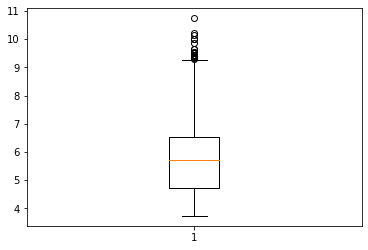

In [11]:
plt.boxplot(data2['x'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2378b6680a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2378b6687c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378b657cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2378b668ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378b6772b0>],
 'means': []}

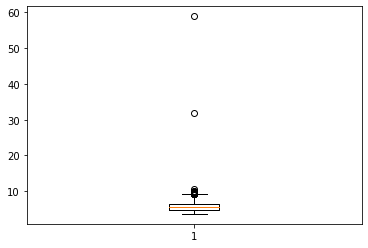

In [12]:
plt.boxplot(data2['y'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2378b6c8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2378b6d9610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378b6c8b20>],
 'medians': [<matplotlib.lines.Line2D at 0x2378b6d9d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378b6e6100>],
 'means': []}

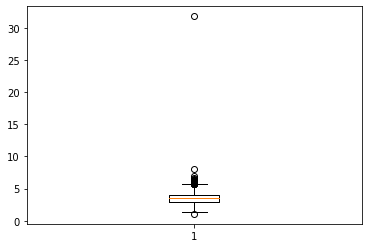

In [13]:
plt.boxplot(data2['z'])

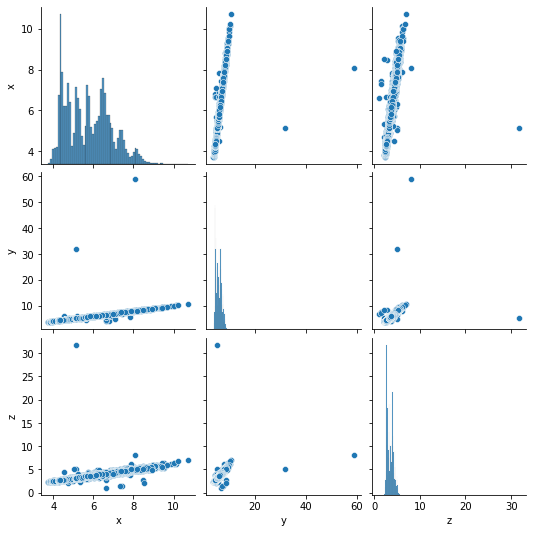

In [14]:
sns.pairplot(data2[['x','y','z']])
plt.show()

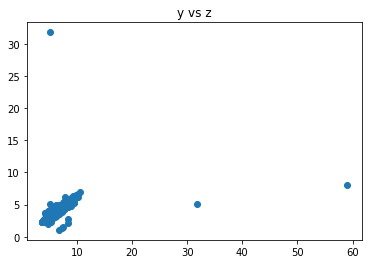

In [15]:
plt.scatter(data2['y'],data2['z'])
plt.title('y vs z')
plt.show()

In [16]:
data2[data2['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [17]:
data2[data2['z']>30].index

Int64Index([48410], dtype='int64')

In [18]:
data3 = data2.drop([24067, 49189,48410])

In [19]:
data3.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


### missing values

In [20]:
data3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [21]:
data3.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

### numerical missing values first

* using central tendencies

<function matplotlib.pyplot.show(close=None, block=None)>

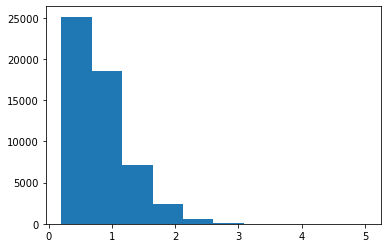

In [22]:
plt.hist(data3['carat'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

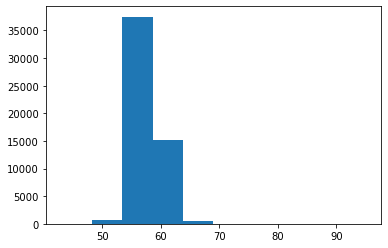

In [23]:
plt.hist(data3['table'])
plt.show

### categorical value

In [24]:
data3['color'].value_counts()

G    11234
E     9795
F     9539
H     8301
D     6774
I     5422
J     2808
Name: color, dtype: int64

* carat and table filled with median and color filled with mode

In [25]:
carat_median = data3['carat'].median()
table_median = data3['table'].median()
color_median = data3['color'].mode()[0]

In [26]:
print(carat_median,table_median,color_median)

0.7 57.0 G


In [27]:
data3['carat']=data3['carat'].fillna(carat_median)
data3['table']=data3['carat'].fillna(table_median)
data3['color']=data3['color'].fillna(color_median)

In [28]:
data3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

### knn imputer or basyian imputer

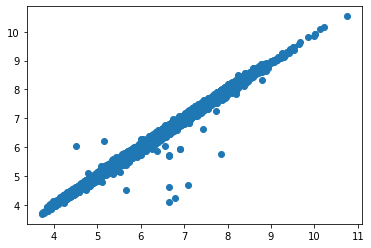

In [29]:
plt.scatter(data3['x'],data3['y'])

In [30]:
data3

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,0.23,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,0.21,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,0.23,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,0.29,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,0.31,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,0.72,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,0.72,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,0.70,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,0.86,6.15,6.12,3.74,1378.5


In [31]:
data3['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data3['color'])

LabelEncoder()

In [33]:
label_encoder.classes_

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [34]:
label_encoder.transform(data3['color'])

array([1, 1, 1, ..., 0, 4, 0])

* encoding as our wish

In [35]:
label_encoder.classes_ = np.array(['J','I','H','G','F','E','D'])

In [36]:
data3['color'] = label_encoder.transform(data3['color'])

In [37]:
data3.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,5,SI2,0.23,3.95,3.98,2.43,163.0
1,0.21,Premium,5,SI1,0.21,3.89,3.84,2.31,163.0
2,0.23,Good,5,VS1,0.23,4.05,4.07,2.31,163.5
3,0.29,Premium,1,VS2,0.29,4.20,4.23,2.63,167.0
4,0.31,Good,0,SI2,0.31,4.34,4.35,2.75,167.5


In [38]:
data3.shape

(53929, 9)

In [40]:
data3['cut'].nunique(), data3['clarity'].nunique()

(5, 8)

In [41]:
data3 = pd.get_dummies(data3)

### splitting the dataset 

In [42]:
x = data3.drop('price_new',axis=1)
y = data3['price_new']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=42)

In [44]:
x_train.columns

Index(['carat', 'color', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [45]:
num_cols = ['carat','table','x','y','z']

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,num_cols] = sc.fit_transform(x_train[num_cols])

C:\Users\Nimisha.Anandan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [47]:
x_test.loc[:,num_cols] = sc.fit_transform(x_test[num_cols])

C:\Users\Nimisha.Anandan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [48]:
x_train

,carat,color,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
22842,0.722295,4,0.722295,0.945412,0.905596,0.825516,0,0,0,1,0,0,0,0,0,0,0,1,0
27169,2.558485,1,2.558485,2.080437,2.148036,2.026564,0,0,0,1,0,0,0,0,0,0,1,0,0
24464,1.545415,2,1.545415,1.445896,1.490803,1.476687,0,0,1,0,0,0,0,0,0,0,0,0,1
43895,-0.945049,1,-0.945049,-1.056520,-1.039092,-1.084586,0,0,1,0,0,0,0,0,0,0,1,0,0
15260,0.447922,5,0.447922,0.516427,0.581481,0.637400,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,0.426817,5,0.426817,0.686234,0.761545,0.434813,0,0,0,0,1,0,0,0,1,0,0,0,0
44739,-0.586253,3,-0.586253,-0.457728,-0.426875,-0.563649,0,0,0,0,1,0,0,0,0,1,0,0,0
38165,-0.966155,3,-0.966155,-1.119080,-1.111118,-1.113527,0,0,1,0,0,0,1,0,0,0,0,0,0
860,0.215760,0,0.215760,0.355557,0.266370,0.405872,0,0,0,1,0,0,0,1,0,0,0,0,0


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mean_squared_error(y_test,y_pred)

312991.03781578393

In [52]:
r2_score(y_test,y_pred)

0.9204584667500832

In [53]:
# Import the knn regressor class 
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# Use the fit method on training data
knn.fit(x_train, y_train)
# Use the predict method on test data
y_pred_knn = knn.predict(x_test)
mean_squared_error(y_test, y_pred_knn)

99252.18795873508

In [54]:

from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
# Use the fit method on training data
rf_reg.fit(x_train, y_train)
# Use the predict method on test data
y_pred_rf = rf_reg.predict(x_test)

## calculate the mean square error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

70840.92
